# Introduction
The major aim of this notebook is to predict which of the customers will have their loan approved.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv ('LoanData.csv')

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
df.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [21]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [22]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
#two types of data
#numerical(median())
#categorical(mode()[0])

In [24]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [25]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
#numerical values left
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [27]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# outliers Detection and Handling

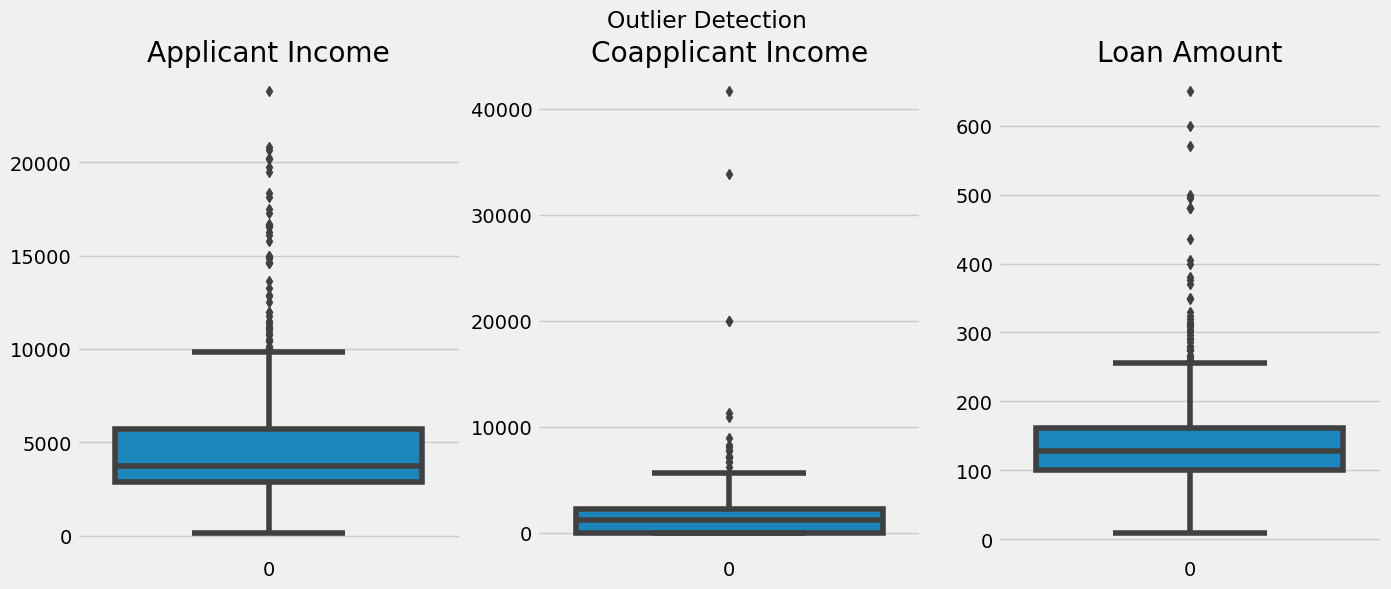

In [32]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(15,6)

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

fig, axs = plt.subplots(1, 3)

sns.boxplot(df['ApplicantIncome'], ax=axs[0])
axs[0].set_title('Applicant Income')

sns.boxplot(df['CoapplicantIncome'], ax=axs[1])
axs[1].set_title('Coapplicant Income')

sns.boxplot(df['LoanAmount'], ax=axs[2])
axs[2].set_title('Loan Amount')

plt.suptitle("Outlier Detection")
plt.show()

In [33]:
#removing outliers
print('Before removing outliers', df.shape)
df=df[df['ApplicantIncome']<25000]
print('After removing outliers', df.shape)

Before removing outliers (607, 13)
After removing outliers (607, 13)


In [34]:
#removing outliers
print('Before removing outliers', df.shape)
df=df[df['CoapplicantIncome']<12000]
print('After removing outliers', df.shape)

Before removing outliers (607, 13)
After removing outliers (603, 13)


In [35]:
#removing outliers
print('Before removing outliers', df.shape)
df=df[df['LoanAmount']<400]
print('After removing outliers', df.shape)

Before removing outliers (603, 13)
After removing outliers (591, 13)


# Analysis

C:\Users\Ajesh\AppData\Local\Temp\ipykernel_15072\1218594358.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'], color='green')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ajesh\AppData\Local\Temp\ipykernel_15072\1218594358.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function 

<Axes: xlabel='LoanAmount', ylabel='Density'>

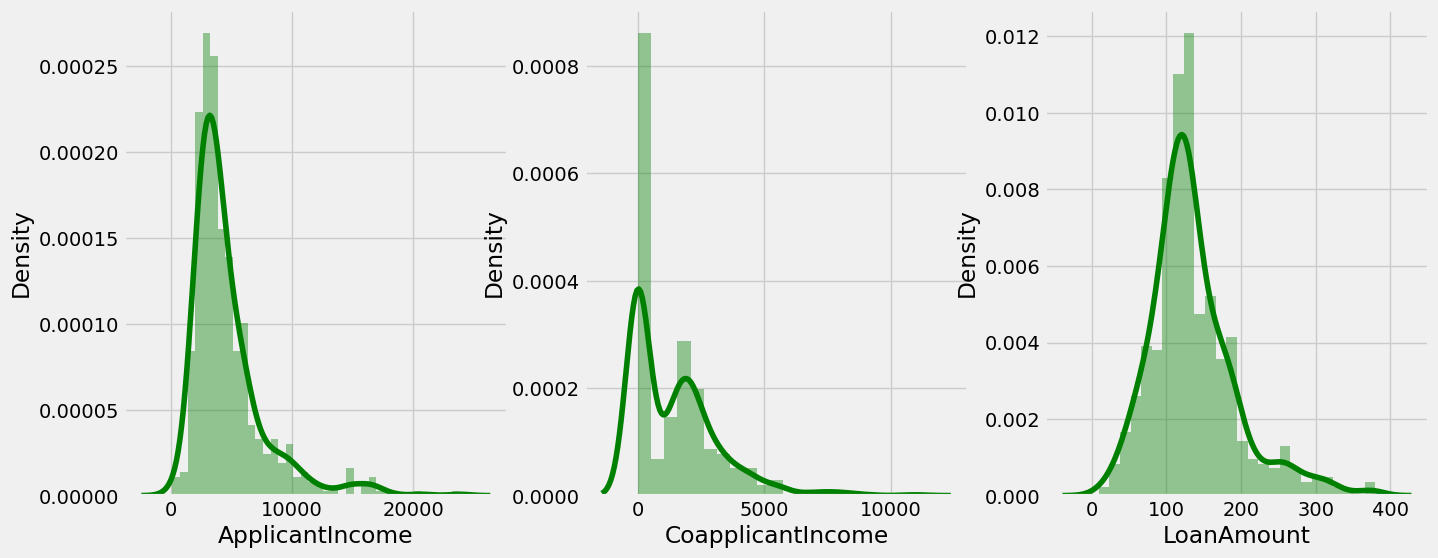

In [36]:
#check the df after removing outliers to find its disitribution
plt.subplot(1,3,1)
sns.distplot(df['ApplicantIncome'], color='green')
plt.subplot(1,3,2)
sns.distplot(df['CoapplicantIncome'], color='green')
plt.subplot(1,3,3)
sns.distplot(df['LoanAmount'], color='green')

#both first and 2nd are right skewed, 3rd one is normal distrib, now changing the first two into normal distr

C:\Users\Ajesh\AppData\Local\Temp\ipykernel_15072\2261779482.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'], color='green')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ajesh\AppData\Local\Temp\ipykernel_15072\2261779482.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function 

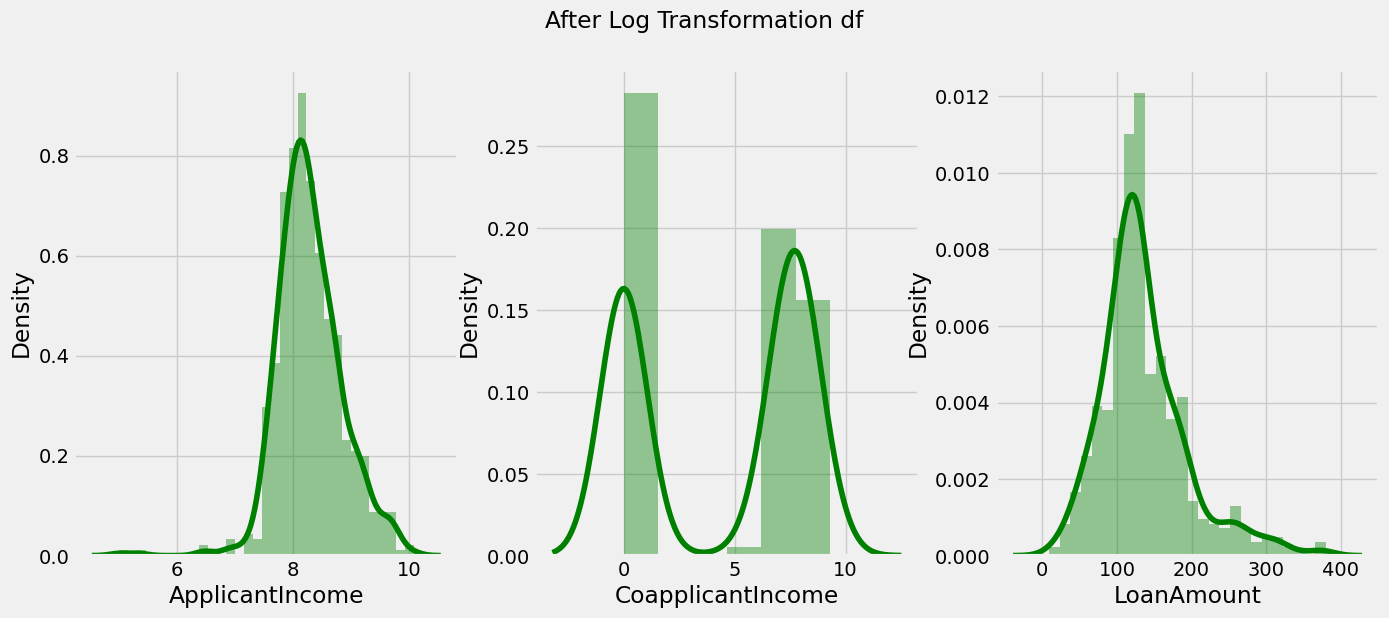

In [37]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])
df['CoapplicantIncome']=np.log1p(df['CoapplicantIncome'])

plt.subplot(1,3,1)
sns.distplot(df['ApplicantIncome'], color='green')
plt.subplot(1,3,2)
sns.distplot(df['CoapplicantIncome'], color='green')
plt.subplot(1,3,3)
sns.distplot(df['LoanAmount'], color='green')

plt.suptitle('After Log Transformation df')
plt.show()

In [38]:
num = df.select_dtypes('number').columns.tolist()
cat = df.select_dtypes('object').columns.tolist()

In [39]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [40]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [41]:
#imbalanced or not

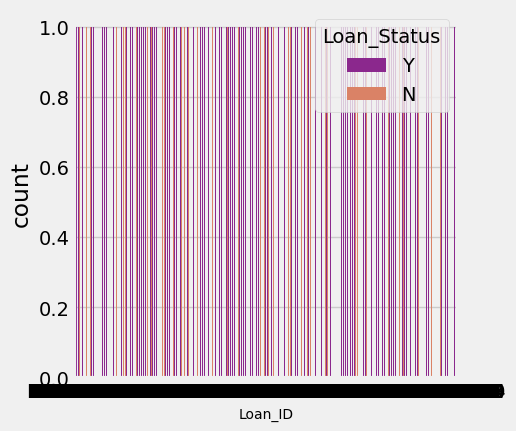

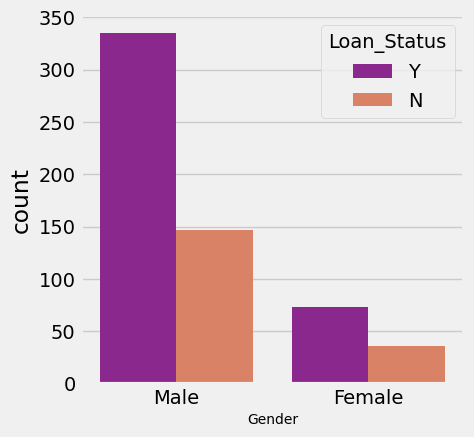

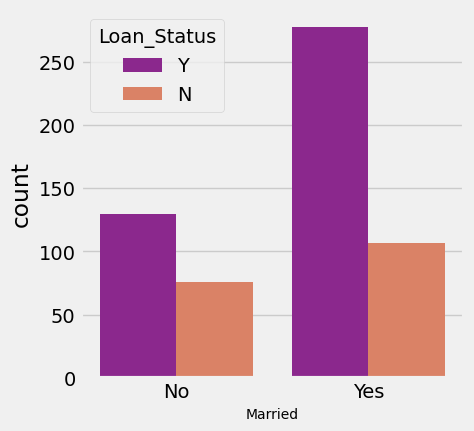

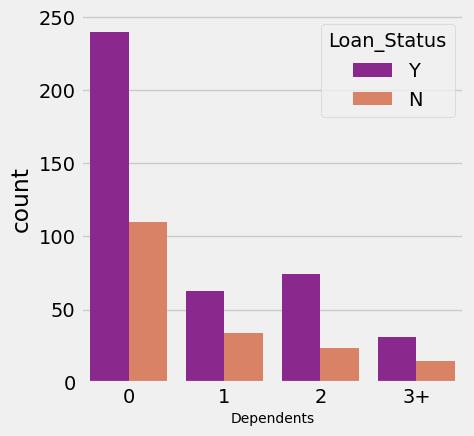

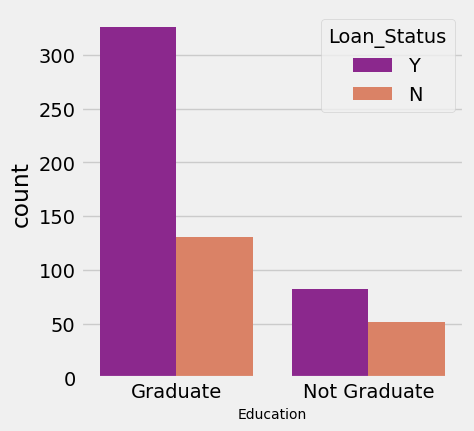

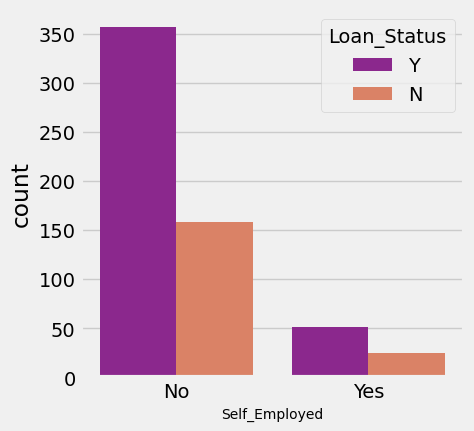

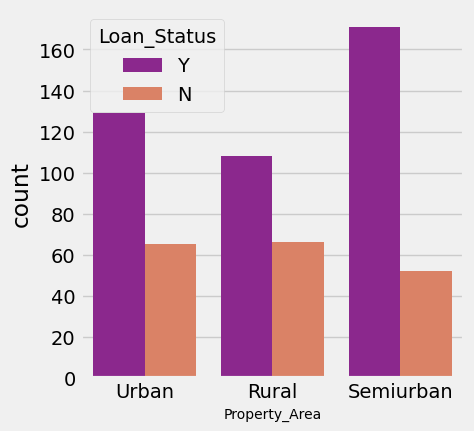

In [42]:
for i in cat[:-1]: #cat data analysis
    plt.figure(figsize = (15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i, hue='Loan_Status', data=df, palette = 'plasma')
    plt.xlabel(i,fontsize = 10)

In [72]:
3df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [73]:
#plt cat with target data

print(pd.crosstab(df['Loan_Status'],df['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [74]:
print(pd.crosstab(df['Loan_Status'],df['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [75]:
print(pd.crosstab(df['Loan_Status'],df['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [76]:
print(pd.crosstab(df['Loan_Status'],df['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


In [77]:
#Data Preparation

In [78]:
df.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [79]:
df=df.drop(['Loan_ID'], axis=1)

In [81]:
df.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [85]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    223
Urban        194
Rural        174
Name: count, dtype: int64

In [101]:
df['Dependents'].value_counts()

Dependents
0    350
1    241
Name: count, dtype: int64

In [108]:
df['Gender']=df['Gender'].replace(('Male', 'Female'),(1,0))
df['Married']=df['Married'].replace(('Yes', 'No'),(1,0))
df['Education']=df['Education'].replace(('Graduate', 'Not Graduate'),(1,0))
df['Self_Employed']=df['Self_Employed'].replace(('Yes', 'No'),(1,0))
df['Property_Area']=df['Property_Area'].replace(('Urban','Semiurban','Rural'),(1,1,0))
df['Dependents'] = df['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 1, 1)) #not a catagorical data bt 

In [119]:
df['Loan_Status']=df['Loan_Status'].replace(('Y', 'N'),(1,0))

In [120]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


In [121]:
y=df['Loan_Status']
x=df.drop(['Loan_Status'], axis=1)

In [122]:
x.shape

(591, 11)

In [123]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [124]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 591, dtype: int64

In [125]:
y.shape

(591,)

# handle imbalanced data

In [183]:
from imblearn.over_sampling import SMOTE

In [184]:
x_rasmple, y_rasmple = SMOTE().fit_resample(x,y.values.ravel())

In [185]:
print(x_rasmple.shape)
print(y_rasmple.shape)

(816, 11)
(816,)


In [186]:
y.shape

(591,)

# Train test split

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
x_train, x_test, y_train, y_test=train_test_split(x_rasmple, y_rasmple, test_size =0.2, random_state=0)

In [189]:
y_train.shape

(652,)

In [190]:
y_test.shape

(164,)

# Model Building

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [192]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [193]:
y_pred = LR.predict(x_test)

In [194]:
print('Training Accuracy', LR.score(x_train, y_train))
print('Training Accuracy', LR.score(x_test, y_test))

Training Accuracy 0.7791411042944786
Training Accuracy 0.774390243902439


In [195]:
from sklearn.metrics import classification_report

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75        82
           1       0.73      0.87      0.79        82

    accuracy                           0.77       164
   macro avg       0.78      0.77      0.77       164
weighted avg       0.78      0.77      0.77       164



In [197]:
print('Our Model Accuracy is', accuracy_score(y_pred, y_test))

Our Model Accuracy is 0.774390243902439


In [198]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [201]:
model_pred= np.array([[1,0,1,1,1,3924, 1733, 148.0, 360, 1,1]])

In [202]:
prediction = LR.predict(model_pred)
print(prediction[0])

0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [203]:
import pickle